In [3]:
!pip install mediapipe

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.1/36.1 MB 45.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 18.5 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.46.0 requires cloudpickle~=2.2.1, but you have cloudpickle 3.0.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
apache-beam 2.46.0 requires protobuf<4,>3.12.2, but you have protobuf 4.25.5 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 16.1.0 which is inc

In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Ufl04ATrDjaUKYZdsr6y")
project = rf.workspace("sam-vcqdz").project("object-detection-ikxzz")
version = project.version(1)
dataset = version.download("yolov11")
                

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 2.3 MB/s eta 0:00:00
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Object-Detection-1 in yolov11:: 100%|██████████| 9040/9040 [00:01<00:00, 6577.74it/s]


In [120]:
for i in range(50):
    with open(glob.glob('/kaggle/working/Object-Detection-1/valid/labels/*.txt')[i], 'r') as f:
        text =(f.read())
        print(text)

In [109]:
(glob.glob('/kaggle/working/Object-Detection-1/valid/labels/*.txt')[0])

'/kaggle/working/Object-Detection-1/valid/labels/27_jpg.rf.7f52e7170bf97f044682e67bbc3c339c.txt'

In [105]:
len(glob.glob('/kaggle/working/Object-Detection-1/valid/labels/*.txt'))

903

In [11]:
import path, os
os.path.join('/kaggle/working/Object-Detection-1/valid/images', '*jpg')

'/kaggle/working/Object-Detection-1/valid/images/*jpg'

In [31]:
import numpy as np
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import path
import glob
# Initialize MediaPipe for pose estimation
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
# Path to the image
len_images = len(glob.glob('/kaggle/working/Object-Detection-1/train/images/*.jpg'))
# Load the image
Pos_estimation = []
for i in range(0, 4):
    image_path = (glob.glob('/kaggle/working/Object-Detection-1/train/images/*.jpg')[i])
    image = cv2.imread(image_path)
    if image is None:
        print("Image not found.")
    else:
        with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5) as pose:
            # Convert image to RGB and process it with MediaPipe Pose
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            results = pose.process(image_rgb)

            # Check if landmarks are detected
            if results.pose_landmarks:
                # Draw pose landmarks on the image
                # mp_drawing.draw_landmarks(
                #     image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

                # Extract coordinates for lying down detection
                landmarks = results.pose_landmarks.landmark
                print((landmarks[0].x))
                print((landmarks[0].y))
                print('-'*15)
                # left_shoulder = landmarks[mp_pose.PoseLandmark.LEFT_SHOULDER]
                # right_shoulder = landmarks[mp_pose.PoseLandmark.RIGHT_SHOULDER]
                # left_hip = landmarks[mp_pose.PoseLandmark.LEFT_HIP]
                # right_hip = landmarks[mp_pose.PoseLandmark.RIGHT_HIP]

                # # Calculate horizontal distances
                # shoulder_distance = abs(left_shoulder.x - right_shoulder.x)
                # hip_distance = abs(left_hip.x - right_hip.x)
            
                # # Heuristic: check if shoulders and hips are approximately aligned
                # if shoulder_distance > 0.4 and hip_distance > 0.4:
                #     cv2.putText(image, 'Person is lying down', (50, 50), 
                #                 cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2, cv2.LINE_AA)

    # Convert back to RGB for display
    # image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # # Display the image with pose landmarks
    # plt.figure(figsize=(10, 10))
    # plt.imshow(image_rgb)
    # plt.axis('off')
    # plt.show()

W0000 00:00:1731211956.346219     492 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731211956.370239     490 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731211956.502647     495 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731211956.535034     495 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


0.6944557428359985
0.6906902194023132
---------------
0.48633819818496704
0.2428617924451828
---------------


W0000 00:00:1731211956.643308     499 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731211956.665419     499 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731211956.773987     503 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731211956.799273     503 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [15]:
cap = cv2.VideoCapture('/kaggle/working/Object-Detection-1/train/images/Lying0056_jpg.rf.28761e53af6b02ac974027a24fabf135.jpg')
cap.set(3, 1280)
cap.set(4, 720)
pos_estimation = []

while 

In [127]:
import numpy as np
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
import glob
import pandas as pd
import path, os
from tqdm import tqdm
# Initialize MediaPipe for pose estimation
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils
def extract_landmarks(folder_path):
    full_images_path = os.path.join(folder_path, 'images/*.jpg')
    full_labels_path = os.path.join(folder_path, 'labels/*.txt')
    len_images = len(glob.glob(full_images_path))
    # Load the image
    Pos_estimation = []
    labels = []
    for i in tqdm(range(len_images)):
        image_path = (glob.glob(full_images_path)[i])
        label_path = (glob.glob(full_labels_path)[i])
        image = cv2.imread(image_path)
        rows, cols, _ = image.shape
        swap = []
        if image is None:
            print("Image not found.")
        else:
            with mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5) as pose:
                # Convert image to RGB and process it with MediaPipe Pose
                image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                results = pose.process(image_rgb)
                # Check if landmarks are detected
                if results.pose_landmarks:
                    # Extract coordinates for lying down detection
                    landmarks = results.pose_landmarks.landmark
                    for id, lm in enumerate(landmarks):
                        cx, cy = int(lm.x*cols), int(lm.y*rows)
                        swap.append(cy)
                    try:
                        with open(label_path, 'r') as f:
                            text = f.read().strip()
                            if text:  # Ensure text is not empty
                                labels.append(int(text.split(' ')[0]))  # Convert to integer
                                Pos_estimation.append(swap)
                            else:
                                print(f"Warning: Empty label in {label_path}")
                    except ValueError as e:
                        print(f"Error reading label from {label_path}: {e}")
                        
    df = pd.DataFrame(Pos_estimation)
    df['label'] = labels
    return df


In [ ]:
df_train = extract_landmarks('/kaggle/working/Object-Detection-1/train')

  0%|          | 0/3160 [00:00<?, ?it/s]W0000 00:00:1731214270.616648    3132 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731214270.638831    3132 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
  0%|          | 1/3160 [00:00<08:45,  6.01it/s]W0000 00:00:1731214270.786823    3139 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731214270.809123    3139 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
  0%|          | 2/3160 [00:00<08:11,  6.43it/s]W0000 00:00:1731214270.933859    3142 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature infer

In [101]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,label
0,442,443,440,436,449,454,454,427,451,422,...,291,179,278,84,177,68,154,71,173,3
1,155,153,154,155,153,154,155,162,163,163,...,319,381,385,496,486,507,491,530,520,2
2,260,259,259,259,262,264,268,269,279,266,...,370,372,381,403,407,421,430,370,366,3
3,247,261,266,270,254,254,253,289,265,253,...,244,309,97,304,85,317,108,264,19,3
4,117,114,115,116,112,112,113,124,121,131,...,310,370,383,393,506,381,519,437,551,2


In [122]:
df_train.shape

(2438, 34)

In [128]:
df_valid = extract_landmarks('/kaggle/working/Object-Detection-1/valid')

  0%|          | 0/903 [00:00<?, ?it/s]W0000 00:00:1731216501.502824   21292 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731216501.525551   21292 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
  0%|          | 1/903 [00:00<02:20,  6.44it/s]W0000 00:00:1731216501.662294   21297 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731216501.686740   21297 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
  0%|          | 2/903 [00:00<02:23,  6.29it/s]W0000 00:00:1731216501.827025   21303 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inferenc

In [130]:
df_valid.head()

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,label
0,181,155,150,144,162,162,163,134,159,190,...,541,672,714,923,935,955,958,1021,1042,3
1,498,505,505,505,505,505,505,499,500,491,...,293,244,239,156,158,142,145,116,130,1
2,349,351,350,349,356,359,361,353,369,346,...,326,291,290,291,259,299,261,264,237,1
3,204,218,223,227,215,216,217,249,232,213,...,240,346,134,389,159,406,182,347,116,1
4,356,345,341,338,356,360,364,333,371,354,...,427,413,450,447,462,451,458,459,478,1


In [131]:
df_test = extract_landmarks('/kaggle/working/Object-Detection-1/test')
df_test.head()

  0%|          | 0/451 [00:00<?, ?it/s]W0000 00:00:1731216690.644132   24938 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731216690.673857   24940 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
  0%|          | 1/451 [00:00<01:12,  6.22it/s]W0000 00:00:1731216690.806220   24941 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1731216690.828863   24941 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
  0%|          | 2/451 [00:00<01:10,  6.35it/s]W0000 00:00:1731216690.953925   24946 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inferenc

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,label
0,200,210,210,210,208,207,205,203,196,186,...,-88,-288,-242,-478,-491,-505,-527,-544,-571,2
1,246,242,241,241,244,245,247,250,259,253,...,357,233,256,344,360,367,384,377,382,3
2,353,353,352,352,362,368,375,381,409,363,...,467,202,236,268,249,304,303,218,209,2
3,314,312,310,308,323,329,336,318,362,317,...,407,168,219,245,298,280,332,208,251,2
4,495,500,500,499,501,500,499,489,488,485,...,304,215,453,107,302,79,262,125,294,2


In [132]:
df_test.shape

(340, 34)

In [133]:
df_train.to_csv('train.csv', index = False)
df_valid.to_csv('valid.csv', index = False)
df_test.to_csv('test.csv', index = False)

In [358]:
data = pd.concat([df_train, df_valid, df_test])

In [327]:
data.shape

(3486, 34)

In [271]:
data.to_csv('data.csv', index = False)

In [359]:
X = data.drop(columns = ['label'])
y = data['label']

In [360]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,442,443,440,436,449,454,454,427,451,422,...,249,291,179,278,84,177,68,154,71,173
1,155,153,154,155,153,154,155,162,163,163,...,314,319,381,385,496,486,507,491,530,520
2,260,259,259,259,262,264,268,269,279,266,...,354,370,372,381,403,407,421,430,370,366
3,247,261,266,270,254,254,253,289,265,253,...,328,244,309,97,304,85,317,108,264,19
4,117,114,115,116,112,112,113,124,121,131,...,306,310,370,383,393,506,381,519,437,551


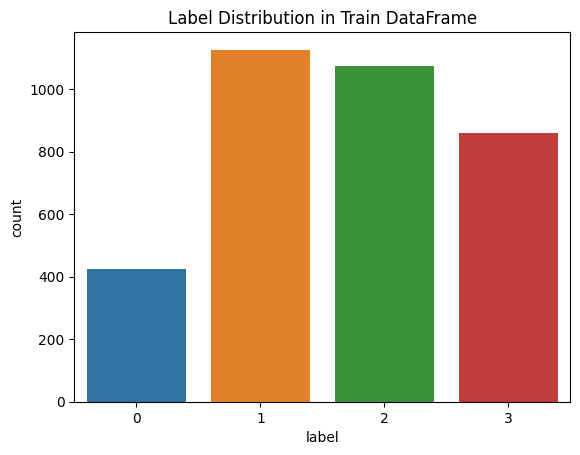

In [361]:
import seaborn as sns
sns.countplot(data = data , x='label')
plt.title('Label Distribution in Train DataFrame')
plt.show()

In [362]:
y_test.value_counts()

label
1    169
2    161
3    129
0     64
Name: count, dtype: int64

In [363]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [364]:
from sklearn.utils import shuffle
X,y=shuffle(X,y)

In [365]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                   test_size= 0.15, random_state=45, stratify=y)

In [334]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(sampling_strategy='auto', random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [366]:
X_train.shape ,y_train.shape

((2963, 33), (2963,))

In [367]:
X_test.shape ,y_test.shape

((523, 33), (523,))

In [337]:
# fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# # Plot count for df_train
# sns.countplot(x=df_train['label'], ax=axes[0])
# axes[0].set_title('Label Distribution in Train DataFrame')
# axes[0].set_xlabel('Labels')
# axes[0].set_ylabel('Count')

# # Plot count for df_valid
# sns.countplot(x=df_valid['label'], ax=axes[1])
# axes[1].set_title('Label Distribution in Valid DataFrame')
# axes[1].set_xlabel('Labels')
# axes[1].set_ylabel('Count')

# # Plot count for df_test
# sns.countplot(x=df_test['label'], ax=axes[2])
# axes[2].set_title('Label Distribution in Test DataFrame')
# axes[2].set_xlabel('Labels')
# axes[2].set_ylabel('Count')

# # Adjust the layout for better spacing between subplots
# plt.tight_layout()
# plt.show()

In [338]:
# X_train = df_train.drop(columns=['label'])
# y_train = df_train['label']

# X_test = df_test.drop(columns=['label'])
# y_test = df_test['label']

# X_valid = df_valid.drop(columns=['label'])
# y_valid = df_valid['label']


In [339]:
# X_train.describe()

In [340]:
# X_valid.describe()

In [341]:
# X_test.describe()

In [342]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_valid = scaler.transform(X_valid)

In [343]:
# from sklearn.utils import shuffle
# X_train, y_train = shuffle(X_train, y_train, random_state=42)
# X_test, y_test = shuffle(X_test, y_test, random_state=42)
# X_valid, y_valid = shuffle(X_valid, y_valid, random_state=42)

In [344]:
# X_train_combined = pd.concat([X_train, X_valid])
# y_train_combined = pd.concat([y_train, y_valid])

In [368]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.svm import LinearSVC, SVC, NuSVC
from sklearn.linear_model import SGDClassifier, Perceptron, LogisticRegression, LogisticRegressionCV, PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, BaggingClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.discriminant_analysis import  QuadraticDiscriminantAnalysis
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier

In [369]:
models = {
    'LinearSVC': LinearSVC(),
    'SGDClassifier': SGDClassifier(),
    'MLPClassifier': MLPClassifier(hidden_layer_sizes=(10,)),
    'Perceptron': Perceptron(),
    'LogisticRegression': LogisticRegression(),
    'LogisticRegressionCV': LogisticRegressionCV(),
    'SVC': SVC(),
    'PassiveAggressiveClassifier': PassiveAggressiveClassifier(),
    'LabelPropagation': LabelPropagation(),
    'LabelSpreading': LabelSpreading(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'QuadraticDiscriminantAnalysis': QuadraticDiscriminantAnalysis(),
    'HistGradientBoostingClassifier': HistGradientBoostingClassifier(),
    'RidgeClassifierCV': RidgeClassifierCV(),
    'RidgeClassifier': RidgeClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'BaggingClassifier': BaggingClassifier(),
    'BernoulliNB': BernoulliNB(),
    'GaussianNB': GaussianNB(),
    'NuSVC': NuSVC(),
    'KNeighborsClassifier' : KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'ExtraTreeClassifier': ExtraTreeClassifier(),
    'CheckingClassifier': DummyClassifier(strategy='constant', constant=1),
    'DummyClassifier': DummyClassifier(strategy='uniform')
}


In [370]:
results = []
models_name = []

for name, model in tqdm(models.items()):
    model.fit(X_train, y_train)  # Train on combined data (train + valid)
    predictions = model.predict(X_test)  # Evaluate on the test data
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions, average='weighted')
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    
    # Store the results and model name
    models_name.append(name)
    results.append([accuracy, precision, recall, f1])

 11%|█         | 3/27 [00:01<00:11,  2.02it/s]Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
 19%|█▊        | 5/27 [00:01<00:05,  4.03it/s]lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the document

In [373]:
Model_accuracy = pd.DataFrame(results,index=models_name,columns = ['Accuracy','Precision','Recall','F1 Score'])

In [374]:
Model_accuracy

,Accuracy,Precision,Recall,F1 Score
LinearSVC,0.338432,0.221012,0.338432,0.264486
SGDClassifier,0.323136,0.104417,0.323136,0.157832
MLPClassifier,0.361377,0.241463,0.361377,0.275624
Perceptron,0.344168,0.281988,0.344168,0.273638
LogisticRegression,0.340344,0.220804,0.340344,0.265272
LogisticRegressionCV,0.336520,0.216779,0.336520,0.260620
SVC,0.328872,0.214844,0.328872,0.252105
PassiveAggressiveClassifier,0.323136,0.104617,0.323136,0.158061
LabelPropagation,0.311663,0.246877,0.311663,0.263020
LabelSpreading,0.313576,0.244347,0.313576,0.259987


In [375]:
max_indices = Model_accuracy.idxmax()
L=list(Model_accuracy.loc[max_indices[0]])
print(f"Model is {max_indices[0]}\nAccuracy:  {L[0]:.2f},\nPrecision: {L[1]:.2f}, \nRecall:    {L[2]:.2f}, \nF1 Score:  {L[3]:.2f}")

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


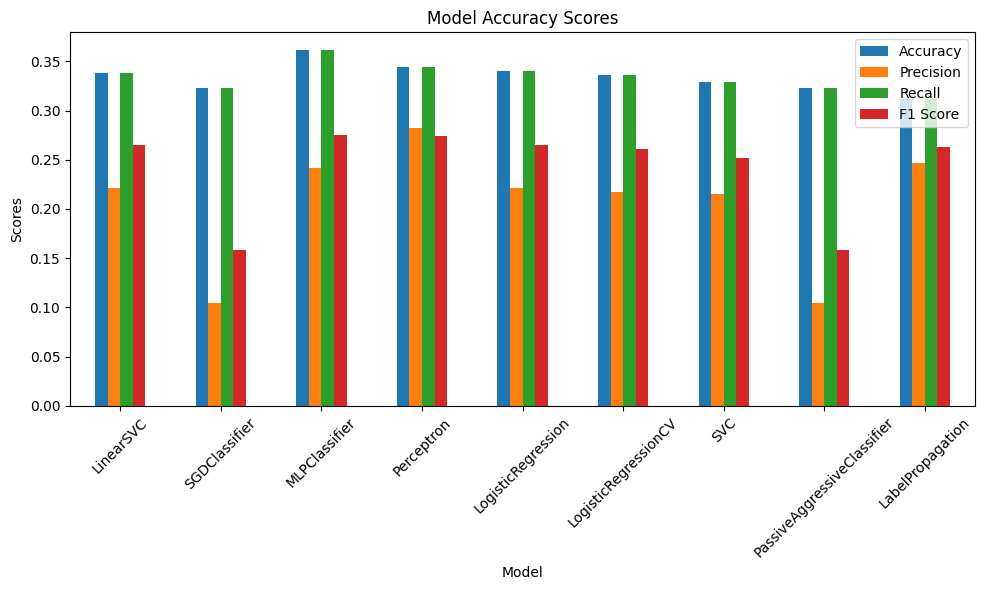

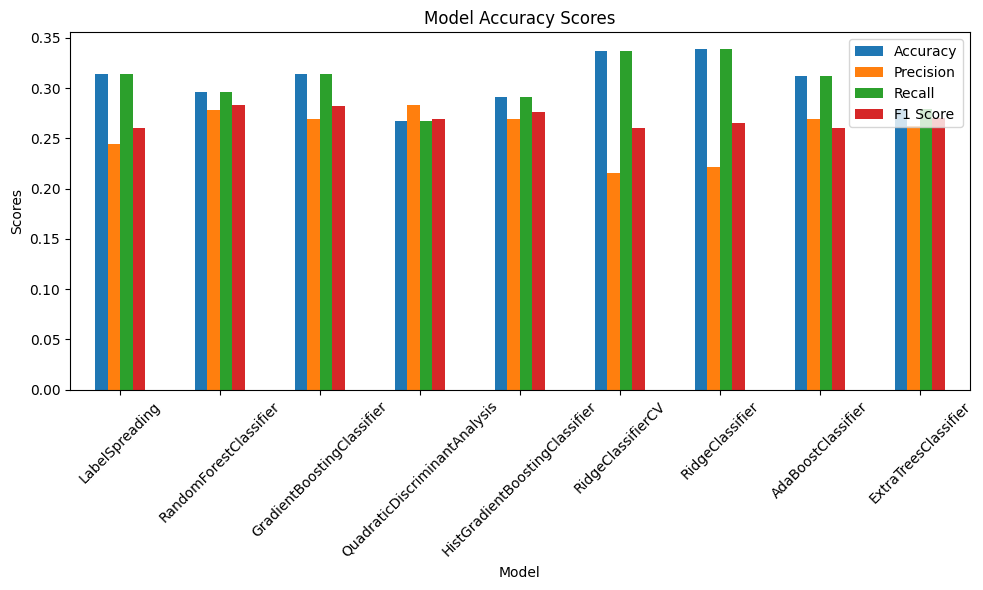

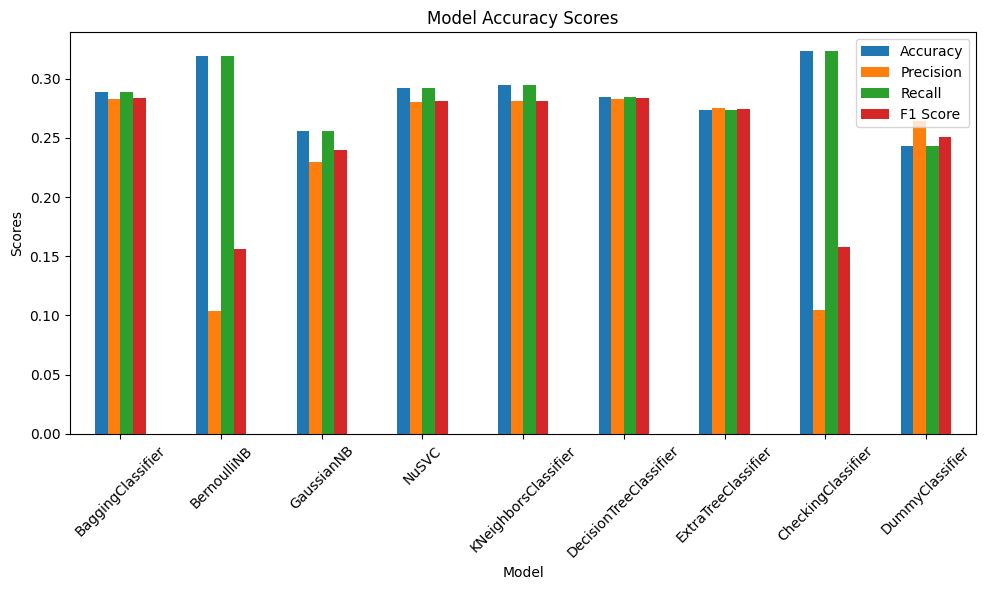

In [376]:
import matplotlib.pyplot as plt
Model_accuracy.iloc[:9,].plot(kind='bar', figsize=(10, 6))

# Customizing the plot

plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Model Accuracy Scores')
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.legend(loc='upper right')
plt.tight_layout()  # Adjust layout to fit labels

# Display the plot
plt.show()
print("""

""")
# Plotting

Model_accuracy.iloc[9:18,].plot(kind='bar', figsize=(10, 6))

# Customizing the plot
plt.title('Model Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.legend(loc='upper right')
plt.tight_layout()  # Adjust layout to fit labels
# Display the plot
plt.show()
print("""

""")

# Plotting

Model_accuracy.iloc[18:,].plot(kind='bar', figsize=(10, 6))

# Customizing the plot
plt.title('Model Accuracy Scores')
plt.xlabel('Model')
plt.ylabel('Scores')
plt.xticks(rotation=45)  # Rotate model names for better readability
plt.legend(loc='upper right')
plt.tight_layout()  # Adjust layout to fit labels

# Display the plot
plt.show()


In [377]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout

# Define the Keras model
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))  # Input layer with 8 neurons=
model.add(BatchNormalization())    
model.add(Dropout(0.25))    
model.add(Dense(256, activation='relu')) 
model.add(BatchNormalization())    
model.add(Dropout(0.25))    
model.add(Dense(128, activation='relu')) 
model.add(BatchNormalization())    
model.add(Dropout(0.25))    
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())    
model.add(Dropout(0.25))    
model.add(Dense(1, activation='sigmoid'))             # Output layer with 1 neuron for binary classification

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model
model.summary()

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 512)            │        17,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193,793 (757.00 KB)

 Trainable params: 191,873 (749.50 KB)

 Non-trainable params: 1,920 (7.50 KB)

In [378]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#checkpoint = ModelCheckpoint('/model.h5', verbose=5, save_best_only=True)
early_stopping = EarlyStopping(patience=10,restore_best_weights=True,monitor='val_loss')

In [383]:
X_test.shape ,y_test.shape

((523, 33), (523,))

In [384]:
X_train.shape ,y_train.shape

((2963, 33), (2963,))

In [379]:
history = model.fit(X_train,y_train,batch_size=16,epochs=100,validation_data=(X_test,y_test),callbacks=[early_stopping])

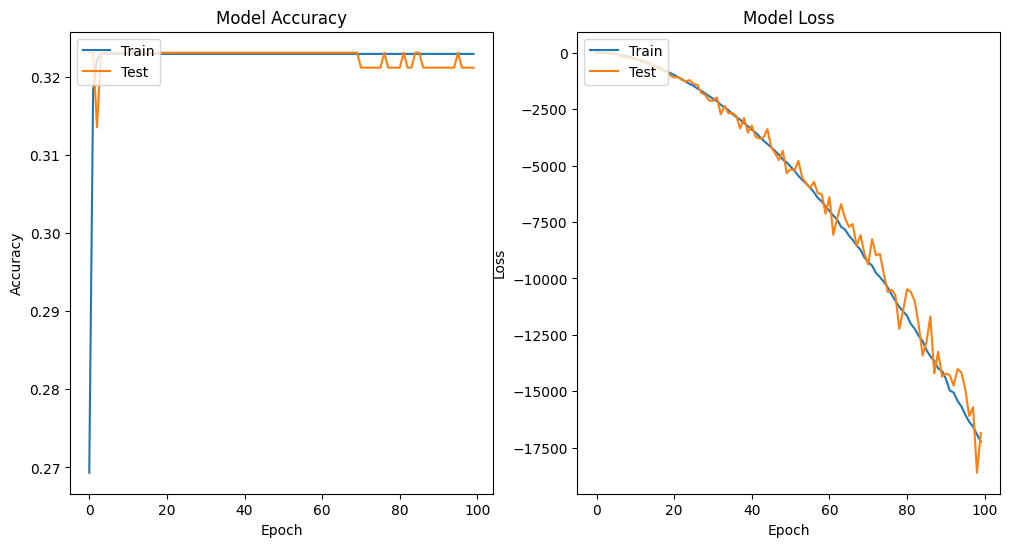

In [380]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()


In [381]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sns

# Assuming 'model' is your trained Keras model and 'X_test', 'Y_test' are your test datasets.

# Predict the classes with the model
predictions = model.predict(X_test)
predicted_classes = predictions.round()

In [382]:
accuracy = accuracy_score(predicted_classes, y_test)
print(f'Accuracy: {accuracy:.2f}')

In [385]:
class_report = classification_report(predicted_classes, y_test)
print('Classification Report:')
print(class_report)

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [386]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout,LSTM,Embedding

# Assume you have signal data (X) and corresponding target values (y)
# X shape: (num_samples, num_timesteps, num_features)

model_rnn = Sequential()
model_rnn.add(Embedding(input_dim=(X_train.shape[1]), output_dim=64))

model_rnn.add(LSTM(512,return_sequences=True))  
model_rnn.add(BatchNormalization())    
model_rnn.add(Dropout(0.25))    

model_rnn.add(LSTM(256))  
model_rnn.add(BatchNormalization())    
model_rnn.add(Dropout(0.25))    

model_rnn.add(Dense(1, activation='sigmoid'))             # Output layer with 1 neuron for binary classification

# Compile the model
model_rnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Summary of the model
model_rnn.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [387]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
early_stopping = EarlyStopping(patience=10,restore_best_weights=True,monitor='val_loss')

In [388]:
history = model_rnn.fit(X_train,y_train,batch_size=32,epochs=100,validation_data=(X_test,y_test),callbacks=[ early_stopping])

KeyboardInterrupt: 